### Geothermal gradient calculation

It is evident form the data shown above that surface heat flow show a large variability. This highlights the heterogenous nature of the Earth's subsurface, particularly in continental regions.

Using surface heat flow in equations (5) and (6), and making assumptions about some of the thermal parameters, one can calculate the geothermal gradient in the lithosphere (more details in notebook 2):

$$ T_{b} = T_{0} + \frac{q_{0}}{k} z - \frac{A\Delta z^{2}}{2k} \tag{5}$$

$$ q_{b} = q_{0} - A\Delta z \tag{6}$$

|   |
|---|
| <img src="images/geotherm_lithosphere_structure.png" alt="Lithosphere" width="400"/> |
| ***Figure 2:** The assumed lithospheric structure used for calculating the geothermal gradient* |

**Known variables**:
- T[0]: surface temperature (273 $K$);
- T[3]: temperature at the base of the lithosphere (1613 $K$);
- q[0]: surface heat flow ($Wm^{-2}$);
- q[3]: heat flow at the base of the lithosphere ($Wm^{-2}$);

- $\Delta z$: thicknesses of lithospheric layers;
- A[2], A[3]: radiogenic heat productions for lower crust, and mantle lithosphere (negligible)  ($Wm^{-3}$).
- k: thermal conductivity, assumed constant (see Table 1; $Wm^{-1}K^{-1}$).

**Unknown variables**:
- T[1]; T[2]: temperatures at the top/base of the lower crust;
- A[1]: radiogenic heat production in the upper crust;
- q[1], q[2]: heat flows at the top of lithospheric layers.

**Table 1:** Thermal conductivity at room temperature and atmospheric pressure (Cermak and Rybach 2005; [Chapman 1986](https://doi.org/10.1144/GSL.SP.1986.024.01.07)).


| Rock type   | Thermal conductivity $(W m^{-1} K^{-1})$|
|:----------  |:---------------------------------------:|
| Granite     | 3.0                                     |
| Diorite     | 2.91                                    |
| Granodiorite| 2.65                                    |
| Gabbro      | 2.63                                    |
| Amphibolite | 2.46                                    |
| Gneiss      | 2.44                                    |
| Granulite   | 2.6                                     |

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

,Layer,Thickness (km),Heat production (W/m3),Heat flow (mW/m2),Top temperature (K),Base temperature (K)
0,Upper crust,20.0,3.727273e-06,100.000000,273.000000,774.818182
1,Lower crust,20.0,2.500000e-07,25.454545,774.818182,958.454545
2,Lithospheric mantle,80.0,0.000000e+00,20.454545,958.454545,1613.000000
3,Lithosphere,120.0,NaN,NaN,NaN,NaN


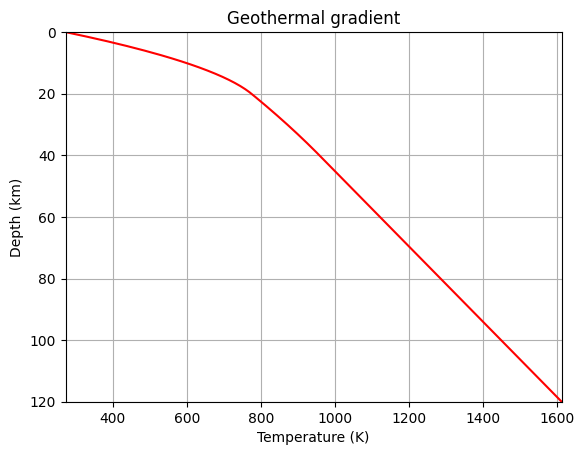

In [ ]:
#-------------------------------------------------------------------------------
# Compute and plot the geothermal gradient
#-------------------------------------------------------------------------------
# radiogenic heat production in the lithosphere is the sum of the heat produced
# in the crust + mantle lithopshere, so we just set it to a dummy value
# All the other values that needs to be computed are set to nan initially.
k   = 2.5                                               # Thermal conductivity W/(m*K)
dz  = np.array([120.e3,20.e3,20.e3,80.e3])              # Layer thickness (m)
A   = np.array([float('nan'), 1.e-6, 0.25e-6, 0.])      # Radiogenic heat production (W/m**3)
T   = np.array([273., float('nan'), float('nan'),1613]) # Temperature at top of layers (K)
q   = np.array([0.1, float('nan'), float('nan'), 0.])   # Heat flow at top of layers (W/m**2)
ATG = 0                                                 # Asthenospheric thermal gradient (k/m) - e.g., 0.25e-3

# depth values
z_max = dz[0]    # maximum depth
zi = 0.5e3       # depth increment
# range of values at which temperatures are computed
z  = np.array(range(0, int(z_max/zi)+1, 1))*0.5e3   # depth from 0 to z_max (0.5 km increments)
Ti = np.array(range(0, int(z_max/zi)+1, 1))*0.      # array for temperature values

# Calculate radiogenic heat production in the upper crust A[1]
# solving the recursively the system of equations (5) and (6) for unknown
# temperature and heat flow values.
A[1] = 2*k/(dz[1]*(2*dz[0]-dz[1]))*(T[0]-T[3]+(q[0]*dz[0] -A[2]*dz[2]*dz[3])/k - \
                                   (A[2]*dz[2]**2 + A[3]*dz[3]**2)/(2*k))

# Calculate surface heat flows at boundaries between layers
q[1] = q[0] - A[1]*dz[1]
q[2] = q[1] - A[2]*dz[2]
q[3] = q[2] - A[3]*dz[3]

# Calculate temperatures at top of layers
T[1] = T[0] + (q[0]/k)*dz[1] - (A[1]*dz[1]**2)/(2.*k)
T[2] = T[1] + (q[1]/k)*dz[2] - (A[2]*dz[2]**2)/(2.*k)
T[3] = T[2] + (q[2]/k)*dz[3] - (A[3]*dz[3]**2)/(2.*k)

# Print thermal values

# create a dictionary of variables and values to be displayed
thermal_values = {'Layer': ['Upper crust', 'Lower crust', 'Lithospheric mantle', 'Lithosphere'],
                  'Thickness (km)': [dz[1]/1.e3, dz[2]/1.e3, dz[3]/1.e3, dz[0]/1.e3],
                  'Heat production (W/m3)': [A[1], A[2], A[3], float('nan')],
                  'Heat flow (mW/m2)': [q[0]*1.e3, q[1]*1.e3, q[2]*1.e3, float('nan')],
                  'Top temperature (K)': [T[0], T[1], T[2], float('nan')],
                  'Base temperature (K)': [T[1], T[2], T[3], float('nan')]}

# create a dataframe
thermal_values_df = pd.DataFrame(thermal_values)

# print the dataframe
display(thermal_values_df)

# Calculate temperature as a function of depth
for i in range(np.size(z)):
  if (z[i] <= dz[1]):
    Ti[i] = T[0] + (q[0]/k)*z[i] - (A[1]*(z[i]**2))/(2*k)
  elif (z[i] > dz[1] and z[i] <= (dz[1] + dz[2])):
    Ti[i] = T[1] + (q[1]/k)*(z[i]-dz[1]) - (A[2]*((z[i]-dz[1])**2))/(2*k)
  elif (z[i] > (dz[1] + dz[2]) and z[i] <= (dz[1] + dz[2] + dz[3])):
    Ti[i] = T[2] + (q[2]/k)*(z[i]-dz[1]-dz[2]) - (A[3]*((z[i]-dz[1]-dz[2])**2))/(2*k)
  elif (z[i] > (dz[1]+dz[2]+dz[3])):
    Ti[i] = T[3] + ATG*(z[i]-dz[1]-dz[2]-dz[3])

# Plot results
plt.figure()
plt.plot(Ti, z/1.e3,'r')
plt.xlabel('Temperature (K)')
plt.ylabel('Depth (km)')
plt.title('Geothermal gradient')
plt.ylim(z_max/1.e3,min(z)/1.e3)
plt.xlim(min(Ti),max(Ti))
plt.grid(True)
plt.show()

 &nbsp; <div style="text-align: right">   
    &rarr; <b>NEXT: [Cooling of oceanic lithosphere](./8_cooling_of_oceanic_lithosphere.ipynb)</b> <a href=""></a> &nbsp;&nbsp;
<img src="../assets/education-gem-notebooks_icon.png" alt="icon"  style="width:4%">
    </div>